# Report 1                                                         KITTIWORAWAT Thanapon 22115632

In the last fiscal year of SussexBudgetProductions, the production was unprofittable. In this year, IMDB datasets will be investigated thoroughly, in order to discover patterns, anomalies, form a viable hypotheses and ensure the production will make profit next year.

## Exploratory Data Analysis

According to previous fiscal year, SussexBudgetProductions has produced a film and it turned out to be unprofitable. In the next fiscal year, in order to ensure that the production will be profittable, IMDB data will be analysed to make viable hypothesis. However, the data given is pretty unstructured: there are a lot of NaN (Not a Number) and the column given is pretty excessive and some of them are unrelevant. Therefore, data needs to be munging and cleaning before exploratory data analysis can be conducted on this particular dataset. Then, from result of EDA, hypothese will be tested to confirm the liability of findings and figure out the actionable plan.

First, we Appropriate libraries use in the EDA need to be defined and locate which CSV file will be accessed.
1. Numpy-- data calculation
2. MatPlotLib-- graphical aid
3. Pandas-- use to read CSV files
4. Math
5. Scipy-- Stats

In [6]:
import numpy as np #data calculation library
from matplotlib import pyplot as plt #matplotlib inline
import pandas as pd #read CSV files
import math
from scipy import stats

myfile = 'movie_metadata.csv' #standard imports for when working with pandas

df = pd.read_csv(myfile, index_col = None) #read the movie metadata file into a dataframe in pandas.

df.describe(include = 'all')

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,5024,4939,4993.000000,5028.000000,4939.000000,5020.000000,5030,5036.000000,4.159000e+03,5043,...,5022.000000,5031,5038,4740,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
unique,2,2398,NaN,NaN,NaN,NaN,3032,NaN,NaN,914,...,NaN,47,65,18,NaN,NaN,NaN,NaN,NaN,NaN
top,Color,Steven Spielberg,NaN,NaN,NaN,NaN,Morgan Freeman,NaN,NaN,Drama,...,NaN,English,USA,R,NaN,NaN,NaN,NaN,NaN,NaN
freq,4815,26,NaN,NaN,NaN,NaN,20,NaN,NaN,236,...,NaN,4704,3807,2118,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,140.194272,107.201074,686.509212,645.009761,NaN,6560.047061,4.846841e+07,NaN,...,272.770808,NaN,NaN,NaN,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,NaN,NaN,121.601675,25.197441,2813.328607,1665.041728,NaN,15020.759120,6.845299e+07,NaN,...,377.982886,NaN,NaN,NaN,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,NaN,NaN,1.000000,7.000000,0.000000,0.000000,NaN,0.000000,1.620000e+02,NaN,...,1.000000,NaN,NaN,NaN,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,NaN,NaN,50.000000,93.000000,7.000000,133.000000,NaN,614.000000,5.340988e+06,NaN,...,65.000000,NaN,NaN,NaN,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,NaN,NaN,110.000000,103.000000,49.000000,371.500000,NaN,988.000000,2.551750e+07,NaN,...,156.000000,NaN,NaN,NaN,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,NaN,NaN,195.000000,118.000000,194.500000,636.000000,NaN,11000.000000,6.230944e+07,NaN,...,326.000000,NaN,NaN,NaN,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000


After the details of the data is observed, it showns that there are a lot of NaN (Not a Number) in the data. Data cleaning needs to be done: eliminate all of NaNs.

In [7]:
df.isna().sum() #use to find amount of NaN

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [8]:
no_NaN = df[df['gross'].isnull() == False] #.isnull()-- eliminate NaN
no_NaN

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5034,Color,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,70071.0,Thriller,...,35.0,English,Philippines,Not Rated,7000.0,2005.0,0.0,6.3,NaN,74
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0
5037,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,...,14.0,English,USA,Not Rated,9000.0,2011.0,205.0,6.4,NaN,413
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


After data has been cleansed, columns will be sorted by director name, movie title, gross, budget, revenue, imdb_score, number of critic for reviews, cast total facebook likes, actor 1's name, actor 1's facebook likes, actor 2's name, actor 2's facebook likes, actor 3's name, actor 3's facebook likes, genres and language. This is done to give the data more readable and sensible.

In [9]:
revenue = no_NaN['gross'] - no_NaN['budget'] #define REVENUE by differentiating GROSS and BUDGET
no_NaN['revenue'] = revenue

df_filtered = no_NaN.loc[0:, ['director_name', 'movie_title', 'revenue', 'gross', 'budget',\
                              'imdb_score', 'num_critic_for_reviews', 'cast_total_facebook_likes',\
                              'actor_1_name', 'actor_1_facebook_likes', 'actor_2_name',\
                              'actor_2_facebook_likes','actor_3_name', 'actor_3_facebook_likes',\
                             'genres', 'language']]
    
max_budget = 1500000 #define the variable max budget and store the fund for the movie it this variable
min_imdb_score = 8.0 #minimum IMDB score of 8.0
df_budget = df_filtered[(df_filtered['budget'] <= max_budget) & ['revenue'] > 0]
#filter the dataset with 2 conditions 1. budget less than 1.5m and revenue is shown to be profittable
df_imdb = df_budget[(df_budget['imdb_score'] > min_imdb_score)]
#then, further sort the dataset with the third condition: IMDB score more than 8.0
sort_revenue = df_imdb.sort_values(by = "revenue", ascending = False)
#sorting the filtered data by the revenue (ascending order)
sort_revenue.head(10)

<ipython-input-9-c2be2f10da3f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_NaN['revenue'] = revenue


,director_name,movie_title,revenue,gross,budget,imdb_score,num_critic_for_reviews,cast_total_facebook_likes,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,genres,language
4530,John G. Avildsen,Rocky,116275247.0,117235247.0,960000.0,8.1,141.0,16094,Sylvester Stallone,13000.0,Burgess Meredith,1000.0,Carl Weathers,794.0,Drama|Sport,English
2242,Alfred Hitchcock,Psycho,31193053.0,32000000.0,806947.0,8.5,290.0,1885,Janet Leigh,606.0,Vera Miles,332.0,John Gavin,285.0,Horror|Mystery|Thriller,English
4708,Michael Wadleigh,Woodstock,12700000.0,13300000.0,600000.0,8.1,53.0,778,Joe Cocker,262.0,Jimi Hendrix,227.0,Joan Baez,136.0,Documentary|History|Music,English
4638,Elia Kazan,On the Waterfront,8690000.0,9600000.0,910000.0,8.2,134.0,11094,Marlon Brando,10000.0,Karl Malden,416.0,Rod Steiger,279.0,Crime|Drama|Romance,English
4688,Steve James,Hoop Dreams,7130611.0,7830611.0,700000.0,8.3,53.0,15,William Gates,7.0,Arthur Agee,6.0,Isiah Thomas,2.0,Documentary|Drama|Sport,English
4659,Asghar Farhadi,A Separation,6598492.0,7098492.0,500000.0,8.4,354.0,2501,Shahab Hosseini,786.0,Leila Hatami,712.0,Peyman Moaadi,620.0,Drama|Mystery,Persian
4498,Sergio Leone,"The Good, the Bad and the Ugly",4900000.0,6100000.0,1200000.0,8.9,181.0,16089,Clint Eastwood,16000.0,Luigi Pistilli,34.0,Enzo Petito,24.0,Western,Italian
4458,Guy Ritchie,"Lock, Stock and Two Smoking Barrels",2690677.0,3650677.0,960000.0,8.2,116.0,28294,Jason Statham,26000.0,Jason Flemyng,1000.0,Dexter Fletcher,452.0,Comedy|Crime,English
4496,Quentin Tarantino,Reservoir Dogs,1612029.0,2812029.0,1200000.0,8.4,173.0,28994,Quentin Tarantino,16000.0,Steve Buscemi,12000.0,Chris Penn,455.0,Crime|Drama|Thriller,English
4795,Terry Gilliam,Monty Python and the Holy Grail,999622.0,1229197.0,229575.0,8.3,131.0,2158,Eric Idle,795.0,Michael Palin,561.0,Terry Jones,332.0,Adventure|Comedy|Fantasy,English


Then, we will then start to filter the data to fit with our circumstantial specification. Since we can only accumulate the funding up to 1,500,000; the movie with more than 1,500,000 budgeting will not be analysed. The second measure that will be looked is IMDB score: within our budget limit, we will take the film that is performing well (based on IMDB score) with has a positive revenue and display top ten of these films ranked by revenue.

### Director: John G. Avlidsen

The best director per our financial limitation is John G. Avildsen. In the meantime, we still need to find actors that has more followers on social platforms and able to comply with our budget.

In [10]:
df_actor1 = df_imdb.loc[0:, ['actor_1_name', 'actor_1_facebook_likes']]
df_actor2 = df_imdb.loc[0:, ['actor_2_name', 'actor_2_facebook_likes']]
df_actor3 = df_imdb.loc[0:, ['actor_3_name', 'actor_3_facebook_likes']]
df_genres = no_NaN.groupby('genres')['imdb_score'].mean() #find the average IMDB score of each genres

sort_actor1 = df_actor1.sort_values(by = "actor_1_facebook_likes", ascending = False) #sort actor 1 by their facebook likes
sort_actor2 = df_actor2.sort_values(by = "actor_2_facebook_likes", ascending = False) #sort actor 2 by their facebook likes
sort_actor3 = df_actor3.sort_values(by = "actor_3_facebook_likes", ascending = False) #sort actor 3 by their facebook likes
sort_genres = df_genres.sort_values(ascending = False) #sort genre by their average IMDB score

sort_actor1.head(3), sort_actor2.head(3), sort_actor3.head(3), sort_genres.head(3) #print just top 3 result from sorted data

(           actor_1_name  actor_1_facebook_likes
 4458      Jason Statham                 26000.0
 4496  Quentin Tarantino                 16000.0
 4498     Clint Eastwood                 16000.0,
           actor_2_name  actor_2_facebook_likes
 4496     Steve Buscemi                 12000.0
 4458     Jason Flemyng                  1000.0
 4530  Burgess Meredith                  1000.0,
        actor_3_name  actor_3_facebook_likes
 4530  Carl Weathers                   794.0
 4659  Peyman Moaadi                   620.0
 4496     Chris Penn                   455.0,
 genres
 Crime|Drama|Fantasy|Mystery                 8.5
 Adventure|Animation|Drama|Family|Musical    8.5
 Action|Adventure|Drama|Fantasy|War          8.4
 Name: imdb_score, dtype: float64)

### Genres: Crime | Drama | Fantasy | Mystery

### Actor 1: Jason Statham
### Actor 2: Steve Buscemi
### Actor 3: Carl Weathers

From our analysis, we then ranked actor 1, actor 2 and actor 3 from their social media followers. It does not directly imply to actors' frame, however, it determines how much audiance will be acknowledge by his/her movie via the digital platforms. People who acknowledge the existance of our movie, the higher opportunity that people will watch the movie. Therefore, Facebook likes are taken into account. We choose Jason Statham, Steve Buscemi and Carl Weathers as our actor 1, actor 2 and actor 3 respectively. Focusing on movies' genre, highest average IMDB score is from "Crime | Drama | Fantasy | Mystery"

Exploring the box plots to see further insight information on IMDB score, Revenue, Budget, Gross and Cast Total Facebook Likes. Average value of these aspects need to be looked into thoroughly.

IMDB mean score = 8.33125
Mean Revenue = 11969787.1875
Mean Budget = 794157.625
Mean gross = 12763944.8125
Casts mean Facebook likes = 6878.75


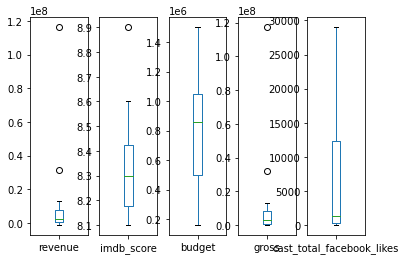

In [11]:
fig, axs = plt.subplots(1, 5)

ax = sort_revenue['imdb_score'].plot(kind = 'box', ax = axs[1]) #boxplot of IMDB score
ax1 = sort_revenue['revenue'].plot(kind = 'box', ax = axs[0]) #boxplot of revenue
ax2 = sort_revenue['budget'].plot(kind = 'box', ax = axs[2]) #boxplot of budget
ax3 = sort_revenue['gross'].plot(kind = 'box', ax = axs[3]) #boxplot of gross
ax4 = sort_revenue['cast_total_facebook_likes'].plot(kind = 'box', ax = axs[4]) #boxplot of cast total facebook likes

imdb_mean = sort_revenue['imdb_score'].mean()
revenue_mean = sort_revenue['revenue'].mean()
budget_mean = sort_revenue['budget'].mean()
gross_mean = sort_revenue['gross'].mean()
cast_likes_mean = sort_revenue['cast_total_facebook_likes'].mean()

print('IMDB mean score =', imdb_mean)
print('Mean Revenue =', revenue_mean)
print('Mean Budget =', budget_mean)
print('Mean gross =', gross_mean)
print('Casts mean Facebook likes =', cast_likes_mean)

As a result of the findings, we could minimized the budget from 1,500,000 to 800,000 and anticipateto gain revenue of 12,000,000 with IMDB rating approximately 8.3.

Text(0.5, 1.0, 'Correlation between Budget and IMDB Score')

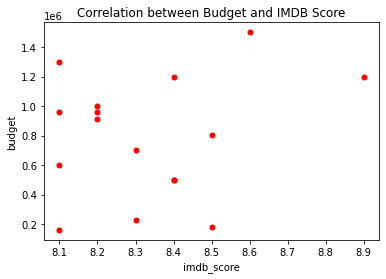

In [12]:
sort_revenue.plot.scatter('imdb_score', 'budget', c = 'red', s = 25)
plt.title("Correlation between Budget and IMDB Score")

Since we decided to spend 800,000, we need statistic confirmation that if only this amount is used will not affect film's performance. Therefore, we need to examine the relationship between revenue yielded and IMDB rating. Scatter plot is used to display correlation between IMDB rating and revenue. We found that there is no (zero) correlation between budget and IMDB rating. Thus, we can conclude that the more budgeting you invest into the production is not necessarily propertional to IMBD rating. The remaining budget fund can be paid to advertisement intermediary company to gain more engagement from public.

## Hypotheses

After we have analysed which director and actors is fit the best per our conditions. We need to do hypothesis testing on whether the film shot in Black & White and coloured will affect IMDB ratings. Null hypothesis: if films were shot in either coloured or black & white then IMDB rating will not be affected. Alternative hypothesis: if films were shot in either coloured or black & white then IMDB rating will be affected. 

In [13]:
color = df[df.color == 'Color']
black_and_white = df[df.color == ' Black and White']

bw_mean = black_and_white['imdb_score'].mean()
c_mean = color['imdb_score'].mean()
bw_std = black_and_white['imdb_score'].std()
c_std = color['imdb_score'].std()
bw_count = black_and_white['imdb_score'].count()
c_count = color['imdb_score'].count()

print('Black and White Mean =', bw_mean)
print('Black and White Standard Deviation =', bw_std)
print('Black and White Count =',              bw_count)
print('Color Mean =',  c_mean)
print('Color Standard Deviation =', c_std)
print('Color Count =', c_count)

Black and White Mean = 7.227272727272724
Black and White Standard Deviation = 0.9073803837637009
Black and White Count = 209
Color Mean = 6.409532710280371
Color Standard Deviation = 1.1195928959764077
Color Count = 4815


My Alpha is 0.34231970457198135


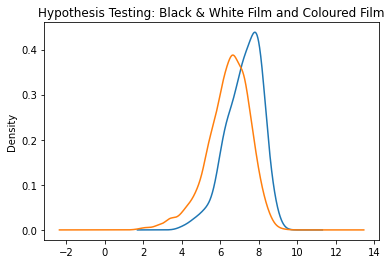

In [14]:
z = (bw_mean - c_mean)/ math.sqrt(((bw_std*2))+((c_std*2)))
alpha = stats.norm.sf(z)
plt.title("Hypothesis Testing: Black & White Film and Coloured Film")
bw = black_and_white.imdb_score.plot.density()
c = color.imdb_score.plot.density()

print('My Alpha is', alpha)

According to hypothesis testing with significance level alpha = 0.05, then it implies that we have to accept the null hypothesis. Which means, whether the film is in black & white or coloured, it will not affect the IMDB rating.

### Film: either Coloured or Black & White

## Actionable Recommendation

From the exploratory data analysis and hypothesis testing, we can conclude that the best production team should consists of John G. Avlidsen as a director and Jason Statham, Steve Buscemi and Carl Weathers as actor 1, actor 2 and actor 3 respectively. Plus, the film should be in Crime | Drama | Fantasy | Mystery genre. On the other hand, alternative actors and director should be designated in case there were an unforeseen event that this plan cannot be executed. Alternative director: Alfred Hitchcock and Michael Wadleigh. Alternative actor 1: Quentin Tarantino and Clint Eastwood. Alternative actor 2: Jason Flemyng and Burgess Meredith. Alternative Actor 3: Peyman Moaadi and Chris Penn. These actors are designated as our back-up plan because they are the next best choice on the filtered data. Nevertheless, if there were no unforseen situation, we will stick with the original set of director and actors. It is tested that we have no use to use up our budget because we can use only 800,000 and still be profittable: as the more money you put in above 800,000 will not do us any good. The remainings, 700,000, can be saved up for following year's production or if the goal is to maximize profit in the next fiscal year, when we can invest the remaining amout of budget in advertisement. Moreover, hypothesis testing suggests that we can either do coloured film or black & white film since it will not affect on IMDB rating from reviewers.

## Conclusion

In [15]:
conclusion = ['Director', 'John G. Avlidsen', 'Alfred Hitchcock and Michael Wadleigh'],\
             ['Actor 1', 'Jason Statham', 'Quentin Tarantino and Clint Eastwood'],\
             ['Actor 2', 'Steve Buscemi', 'Jason Flemyng and Burgess Meredith'],\
             ['Actor 3', 'Carl Weathers', 'Peyman Moaadi and Chris Penn'], \
             ['Genre'], ['Crime | Drama | Fantasy | Mystery']
conclusion

(['Director', 'John G. Avlidsen', 'Alfred Hitchcock and Michael Wadleigh'],
 ['Actor 1', 'Jason Statham', 'Quentin Tarantino and Clint Eastwood'],
 ['Actor 2', 'Steve Buscemi', 'Jason Flemyng and Burgess Meredith'],
 ['Actor 3', 'Carl Weathers', 'Peyman Moaadi and Chris Penn'],
 ['Genre'],
 ['Crime | Drama | Fantasy | Mystery'])

## Reference

https://www.analyticsvidhya.com/blog/2021/05/exploratory-data-analysis-eda-a-step-by-step-guide/ \
https://www.kdnuggets.com/2019/06/select-rows-columns-pandas.html \
https://pandas.pydata.org/docs/user_guide/visualization.html \
https://matplotlib.org/stable/tutorials/colors/colormaps.html \
https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce \
https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/ \
https://towardsdatascience.com/significance-or-hypothesis-tests-with-python-7ed35e9ac9b6